## Projeto 2 - Ciência dos dados

## Integrantes: 

- Luca Guazzelli 

- Pedro Henrique Vidal 

- Rafael Agnelo

## Objetivo: 

- A base de dados é uma base de microdados do ENEM em relação a dados do ENEM por escolas (públicas e privadas) no Brasil. Em relação à isso, faz-se a seguinte pergunta temática:

- A partir de uma série de features (Localidade, Taxa de abandono, Porte da escola , Média das notas em matemática, Tipo da dependência administrativa, Número de participantes do enem que cumprem os requisitos de participação e INSE), qual é o perfil médio de uma escola que performa mal, isto é, de forma insatisfatória em Matemática no ENEM (Média inferior à 500) no ano de 2015?



## Importando Bibliotecas

In [20]:
%matplotlib inline
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt


In [21]:
!pip install dython 

## Carregando base de dados
Por meio da base de dados do INEP, é possível acessar as planilhas de microdados relativas a informações de ENEM por escolas - com mais de 10 participantes - no Brasil.

In [22]:
dados = pd.read_csv('microdados_enem_por_escola\DADOS\MICRODADOS_ENEM_ESCOLA.csv',encoding='latin1', sep=";")

C:\Users\Pedro Vidal\AppData\Local\Temp\ipykernel_85936\2310550405.py:1: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  dados = pd.read_csv('microdados_enem_por_escola\DADOS\MICRODADOS_ENEM_ESCOLA.csv',encoding='latin1', sep=";")


In [23]:
dados.head(5)

,NU_ANO,CO_UF_ESCOLA,SG_UF_ESCOLA,CO_MUNICIPIO_ESCOLA,NO_MUNICIPIO_ESCOLA,CO_ESCOLA_EDUCACENSO,NO_ESCOLA_EDUCACENSO,TP_DEPENDENCIA_ADM_ESCOLA,TP_LOCALIZACAO_ESCOLA,NU_MATRICULAS,...,NU_MEDIA_RED,NU_MEDIA_OBJ,NU_MEDIA_TOT,INSE,PC_FORMACAO_DOCENTE,NU_TAXA_PERMANENCIA,NU_TAXA_APROVACAO,NU_TAXA_REPROVACAO,NU_TAXA_ABANDONO,PORTE_ESCOLA
0,2007,11,RO,1100205,Porto Velho,11000058,CENTRO DE ENSINO CLASSE A,4,1,144,...,NaN,NaN,69.03,NaN,NaN,NaN,91.9,8.1,0.0,Maior que 90 alunos
1,2006,11,RO,1100205,Porto Velho,11000058,CENTRO DE ENSINO CLASSE A,4,1,184,...,NaN,NaN,57.82,NaN,NaN,NaN,NaN,NaN,NaN,Maior que 90 alunos
2,2005,11,RO,1100205,Porto Velho,11000058,CENTRO DE ENSINO CLASSE A,4,1,220,...,NaN,NaN,64.83,NaN,NaN,NaN,86.5,12.4,1.1,Maior que 90 alunos
3,2008,11,RO,1100205,Porto Velho,11000058,CENTRO DE ENSINO CLASSE A,4,1,186,...,72.16,60.02,NaN,NaN,NaN,NaN,90.3,9.7,0.0,Maior que 90 alunos
4,2007,11,RO,1100205,Porto Velho,11000171,CENTRO EDUCACIONAL MOJUCA,4,1,19,...,NaN,NaN,58.84,NaN,NaN,NaN,74.2,21.0,4.8,De 1 a 30 alunos


## Análise exploratória e mineração de dados

De prima, cabe analisar descritivamente os features a fim de entender o comportamento da target nota média. Para tanto, urge:
- 1) Filtrar as colunas das bases de dados que são potencialmente necessárias para traçar um perfil adequado e eficaz.
- 2) Minerar os dados e possibilitar uma análise descritiva detalhada das variáveis, de modo a associar diferentes features graficamente e utilizar ferramentas estatísticas a fim de permitir a análise dos dados.


In [24]:
dados_limpando = dados.loc[dados["NU_ANO"] == 2015,("TP_DEPENDENCIA_ADM_ESCOLA", "TP_LOCALIZACAO_ESCOLA", "NU_TAXA_ABANDONO", "PORTE_ESCOLA", "NU_MEDIA_MT", "INSE")]

dados_limpando

,TP_DEPENDENCIA_ADM_ESCOLA,TP_LOCALIZACAO_ESCOLA,NU_TAXA_ABANDONO,PORTE_ESCOLA,NU_MEDIA_MT,INSE
67619,4,1,0.0,Maior que 90 alunos,627.66,Grupo 6
67628,4,1,0.0,De 1 a 30 alunos,459.72,Grupo 4
67640,4,1,0.0,De 31 a 60 alunos,507.22,Grupo 5
67642,4,1,0.8,De 31 a 60 alunos,529.87,Grupo 5
67648,4,1,2.4,De 1 a 30 alunos,528.93,Grupo 5
...,...,...,...,...,...,...
172288,4,1,0.0,De 61 a 90 alunos,786.28,Grupo 6
172292,2,1,0.0,De 61 a 90 alunos,452.82,Grupo 3
172296,2,1,12.0,Maior que 90 alunos,456.23,Grupo 3
172302,2,1,11.0,Maior que 90 alunos,428.90,Grupo 3


1) "TP_DEPENDENCIA_ADM_ESCOLA" (Tipo da dependência administrativa da escola):
    Tipo: Feature qualitativa.
    Descrição: Indica o tipo de dependência administrativa da escola, classificando-a como Federal, Estadual, Municipal ou Privada.

2) "TP_LOCALIZACAO_ESCOLA" (Localização da escola):
    Tipo: Feature qualitativa.
    Descrição: Indica a localização da escola, sendo classificada como Urbana ou Rural.

3) NU_TAXA_ABANDONO" (Taxa de abandono):
    Tipo: Feature qualitativa.
    Descrição: Representa a taxa de abandono escolar, indicando a proporção de alunos que abandonaram a escola.

4) "PORTE_ESCOLA" (Porte da escola):
    Tipo: Feature qualitativa.
    Descrição: Indica o porte da escola, categorizando-a como Pequena, Média, Grande ou Não se aplica.

5)  "INSE" (Índice de Nível Socioeconômico):
    Tipo: Feature qualitativa.
    Descrição: O INSE é um índice que mede o nível socioeconômico das famílias dos alunos da escola. É categorizado em grupos, sendo numerados de 1 a 6, representando diferentes níveis socioeconômicos, onde o Grupo 1 representa o nível mais baixo e o Grupo 6 o mais alto.

6) "NU_MEDIA_MT" (Média das notas em Matemática no ENEM):
    Tipo: Target qualitativa.
    Descrição: Representa a média das notas obtidas pelos alunos da escola na disciplina de Matemática no Exame Nacional do Ensino Médio (ENEM).

## Analise Descritiva da Target

Agora, pode-se analisar a target (Média de Matemática) perante todas as features e entender acerca das influências de cada uma.


Primeiramente, importa-se a biblioteca seaborn:

In [48]:
import seaborn as sns

O Seaborn é uma biblioteca de visualização de dados em Python que trabalha em conjunto com o Matplotlib. Ele oferece uma interface de alto nível para criar gráficos estatísticos atraentes e informativos. A importação do Seaborn é realizada com o objetivo de aproveitar suas funcionalidades adicionais em relação ao Matplotlib, especialmente no que diz respeito à criação de gráficos estatísticos mais complexos e esteticamente agradáveis.

Com essa biblioteca, é possível otimizar os gráficos BoxPlot que serão criados. O boxplot, ou diagrama de caixa, é um gráfico que permite visualizar a distribuição de uma variável quantitativa em relação a uma variável categórica. Ele é composto por um retângulo que representa o intervalo interquartil (25% a 75% dos dados), uma linha que indica a mediana, além de "bigodes" que representam a amplitude dos dados. O boxplot é uma ferramenta útil para identificar a dispersão e possíveis outliers nos dados, além de permitir a comparação entre diferentes grupos ou categorias.

Também, pensando nas variáveis quantitativas, o scatter plot, ou gráfico de dispersão, é uma representação gráfica que permite observar a relação entre duas variáveis quantitativas. Cada ponto no gráfico representa uma observação, sendo posicionado de acordo com os valores das duas variáveis. Essa visualização nos permite identificar padrões, tendências ou correlações entre as variáveis. O scatter plot é especialmente útil para investigar a relação de causa e efeito entre variáveis ou para identificar possíveis associações entre elas.

Através dessas ferramentas gráficas, é possível explorar e analisar as relações entre as variáveis do conjunto de dados, auxiliando na compreensão dos padrões e tendências presentes. Combinar a visualização gráfica com medidas de resumo e/ou medidas de associação fornece uma análise mais completa e interpretação dos dados, permitindo obter insights valiosos para a tomada de decisões informada

A partir disso, pode-se dar início a construção dos gráficos entre variáveis qualitativas e quantitativas:


1) Gráfico de densidade das notas médias em matemática dos estudantes brasileiros no ENEM

Text(0, 0.5, 'Densidade')

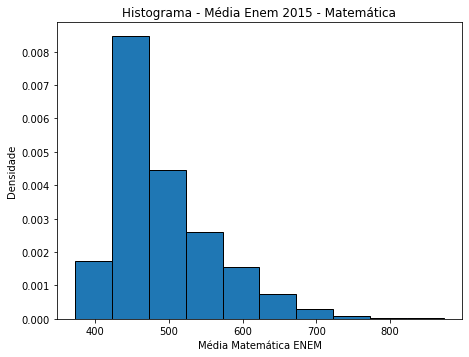

In [58]:
plt.figure(figsize=(16, 12))

plt.subplot(221)
plt.hist(dados_limpando.NU_MEDIA_MT, edgecolor='black', density=True)
plt.title("Histograma - Média Enem 2015 - Matemática")
plt.xlabel('Média Matemática ENEM')
plt.ylabel('Densidade')


2) Dependência admnistrativa (feature qualitativa) X Média das notas em matemática (target quantitativa)

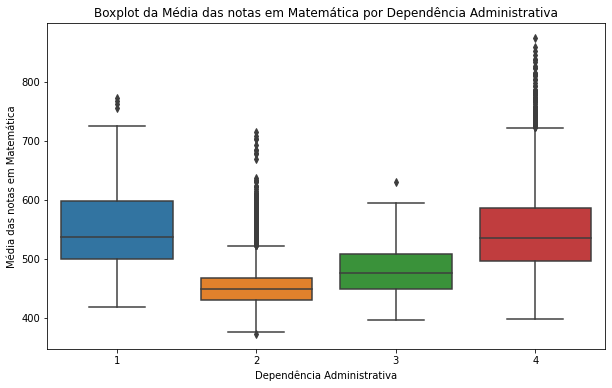

In [59]:

# Boxplot da Média das notas em Matemática segmentadas por Dependência Administrativa
plt.figure(figsize=(10, 6))
sns.boxplot(x='TP_DEPENDENCIA_ADM_ESCOLA', y='NU_MEDIA_MT', data=dados_limpando)
plt.xlabel('Dependência Administrativa')
plt.ylabel('Média das notas em Matemática')
plt.title('Boxplot da Média das notas em Matemática por Dependência Administrativa')
plt.show()


3) Localização da escola (feature qualitativa) X Média das notas em matemática (target quantitativa)

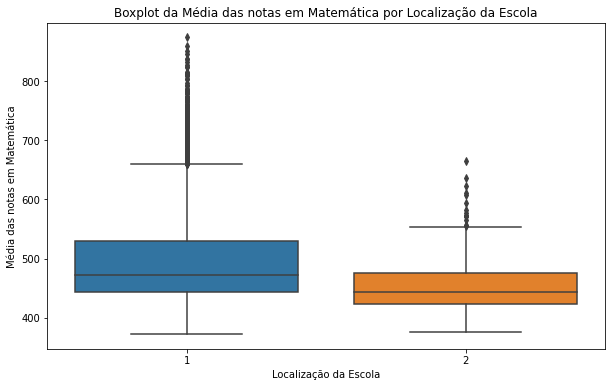

In [60]:
# Boxplot da Média das notas em Matemática segmentadas por Localização da Escola
plt.figure(figsize=(10, 6))
sns.boxplot(x='TP_LOCALIZACAO_ESCOLA', y='NU_MEDIA_MT', data=dados_limpando)
plt.xlabel('Localização da Escola')
plt.ylabel('Média das notas em Matemática')
plt.title('Boxplot da Média das notas em Matemática por Localização da Escola')
plt.show()

In [61]:
# Tabela cruzada
cross_tab = pd.crosstab(dados_limpando['TP_LOCALIZACAO_ESCOLA'], dados_limpando['NU_MEDIA_MT'], normalize='index')

# Gráfico de barras empilhadas
cross_tab.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Localização da Escola')
plt.ylabel('Proporção')
plt.title('Relação entre Localização da Escola e Média das notas em Matemática')
plt.legend(title='Média das notas em Matemática')
plt.show()

c:\Users\Pedro Vidal\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


Text(0, 0.5, 'Densidade')

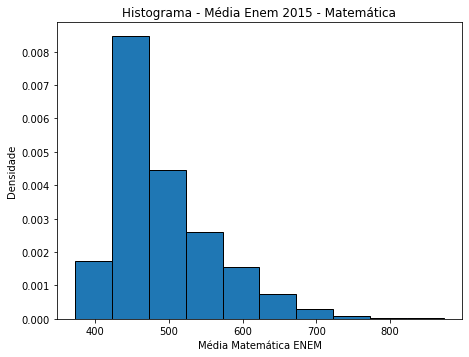

In [ ]:
plt.figure(figsize=(16, 12))

plt.subplot(221)
plt.hist(dados_limpando.NU_MEDIA_MT, edgecolor='black', density=True)
plt.title("Histograma - Média Enem 2015 - Matemática")
plt.xlabel('Média Matemática ENEM')
plt.ylabel('Densidade')



In [ ]:
#Acessando as colunas 
nu_media = dados_limpando['NU_MEDIA_MT']
TP_depen = dados_limpando['TP_DEPENDENCIA_ADM_ESCOLA']
TP_loc = dados_limpando['TP_LOCALIZACAO_ESCOLA'] 
nu_abandona = dados_limpando['NU_TAXA_ABANDONO']

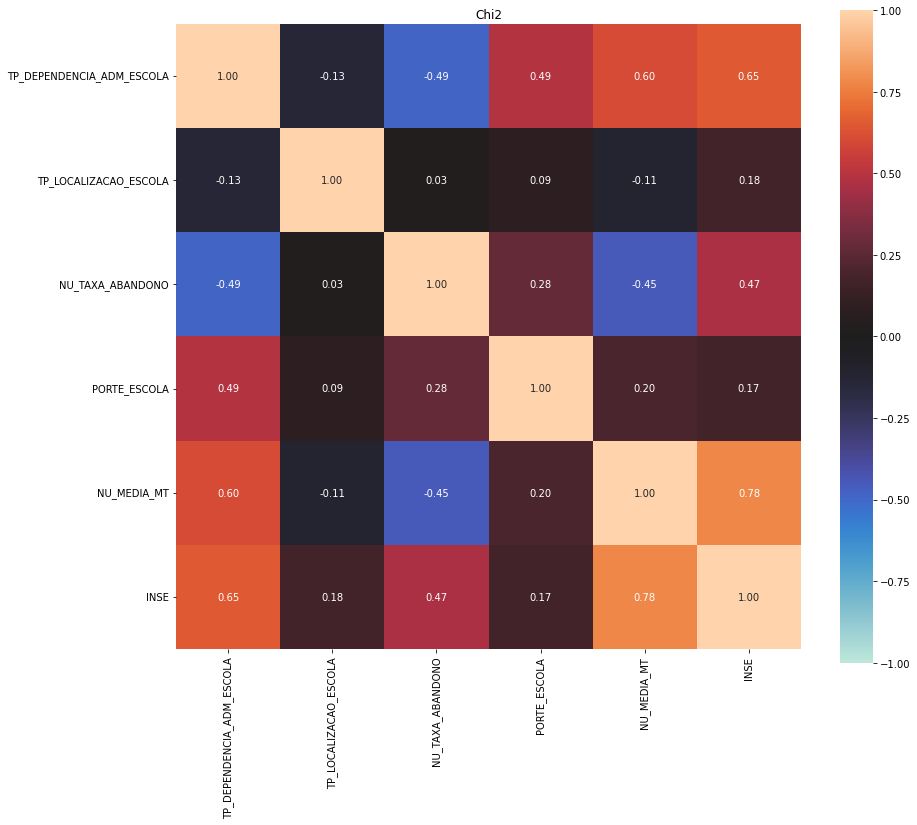

{'corr':                            TP_DEPENDENCIA_ADM_ESCOLA  TP_LOCALIZACAO_ESCOLA  \
 TP_DEPENDENCIA_ADM_ESCOLA                   1.000000              -0.133953   
 TP_LOCALIZACAO_ESCOLA                      -0.133953               1.000000   
 NU_TAXA_ABANDONO                           -0.491872               0.030753   
 PORTE_ESCOLA                                0.485912               0.086309   
 NU_MEDIA_MT                                 0.604000              -0.112197   
 INSE                                        0.652178               0.178834   
 
                            NU_TAXA_ABANDONO  PORTE_ESCOLA  NU_MEDIA_MT  \
 TP_DEPENDENCIA_ADM_ESCOLA         -0.491872      0.485912     0.604000   
 TP_LOCALIZACAO_ESCOLA              0.030753      0.086309    -0.112197   
 NU_TAXA_ABANDONO                   1.000000      0.277055    -0.452961   
 PORTE_ESCOLA                       0.277055      1.000000     0.201365   
 NU_MEDIA_MT                       -0.452961      0.201

In [ ]:
from dython.nominal import associations
associations(dados_limpando, figsize=(14,12), title='Chi2')

KeyboardInterrupt: 

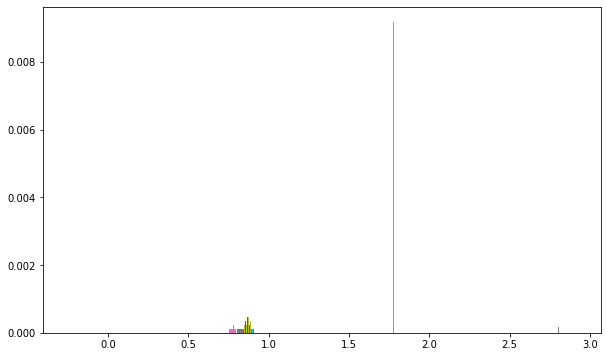

In [ ]:
# Tabela cruzada
cross_tab = pd.crosstab(dados_limpando['TP_DEPENDENCIA_ADM_ESCOLA'], dados_limpando['NU_MEDIA_MT'], normalize='index')

# Gráfico de barras
cross_tab.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Tipo da Dependência Administrativa da Escola')
plt.ylabel('Proporção')
plt.title('Relação entre Tipo da Dependência Administrativa da Escola e Média das notas em Matemática')
plt.legend(title='Média das notas em Matemática')
plt.show()

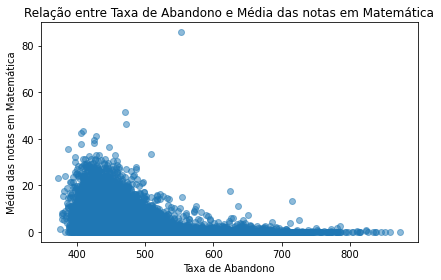

In [ ]:
plt.scatter(dados_limpando ['NU_MEDIA_MT'], dados_limpando['NU_TAXA_ABANDONO'], alpha=0.5)
plt.xlabel('Taxa de Abandono')
plt.ylabel('Média das notas em Matemática')
plt.title('Relação entre Taxa de Abandono e Média das notas em Matemática')
plt.tight_layout()
plt.show()